<a href="https://colab.research.google.com/github/OnePassio/CE888/blob/master/Lab7/Lab7_Exercise4_flower_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Flowers Recognition from Kaggle
This dataset contains labeled 4242 images of flowers.
##API
kaggle datasets download -d alxmamaev/flowers-recognition

#download the database

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "thomastran89" # username from the json file
os.environ['KAGGLE_KEY'] = "29b93919c31aa2997218d05bc048f093" # key from the json file
!kaggle datasets download -d alxmamaev/flowers-recognition

 98% 441M/450M [00:09<00:00, 84.3MB/s]
100% 450M/450M [00:09<00:00, 48.6MB/s]


In [2]:
!ls

flowers-recognition.zip  sample_data


# Unzip data into 'contents' folder

In [0]:
!unzip flowers-recognition.zip

In [4]:
!ls flowers

daisy  dandelion  flowers  rose  sunflower  tulip


## Build test Model for test sunflower & tulip only
dog = tulip
sunflower= cat

In [0]:
base_dir = 'contents'
os.mkdir(base_dir)

In [0]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_sunflower_dir = os.path.join(train_dir, 'sunflower')
os.mkdir(train_sunflower_dir)
validation_sunflower_dir = os.path.join(validation_dir, 'sunflower')
os.mkdir(validation_sunflower_dir)
test_sunflower_dir = os.path.join(test_dir, 'sunflower')
os.mkdir(test_sunflower_dir)

train_tulip_dir = os.path.join(train_dir, 'tulip')
os.mkdir(train_tulip_dir)
validation_tulip_dir = os.path.join(validation_dir, 'tulip')
os.mkdir(validation_tulip_dir)
test_tulip_dir = os.path.join(test_dir, 'tulip')
os.mkdir(test_tulip_dir)

In [7]:
!ls contents/train

sunflower  tulip


In [8]:
test_sunflower_dir

'contents/test/sunflower'

## Copy Data from dataset to model data folder

In [9]:
from os import listdir
from os.path import isfile, join

path_org_sunflower="flowers/sunflower"
path_org_tulip="flowers/tulip"

sunflower_filenames = [f for f in listdir(path_org_sunflower) if isfile(join(path_org_sunflower, f))]
tulip_filenames = [f for f in listdir(path_org_tulip) if isfile(join(path_org_tulip, f))]

print("Total sunflower image files is:{}".format(len(sunflower_filenames)))
print("Total Tulip image files is:{}".format(len(tulip_filenames)))
#print(tulip_filenames)

Total sunflower image files is:734
Total Tulip image files is:984


## Create Data set for train, validate & test (500-100-100)

In [0]:
import shutil
# for sunflower dataset
# sunflower dataset train data
fnames = [sunflower_filenames[i] for i in range(0,500)]
for fname in fnames:
    src = os.path.join(path_org_sunflower, fname)
    dst = os.path.join(train_sunflower_dir, fname)
    shutil.copyfile(src, dst)
# sunflower dataset validate data
fnames = [sunflower_filenames[i] for i in range(500,600)]
for fname in fnames:
    src = os.path.join(path_org_sunflower, fname)
    dst = os.path.join(validation_sunflower_dir, fname)
    shutil.copyfile(src, dst)
# sunflower dataset test data
fnames = [sunflower_filenames[i] for i in range(600,700)]
for fname in fnames:
    src = os.path.join(path_org_sunflower, fname)
    dst = os.path.join(test_sunflower_dir, fname)
    shutil.copyfile(src, dst)

# for tulip dataset
# tulip dataset train data
fnames = [tulip_filenames[i] for i in range(0,500)]
for fname in fnames:
    src = os.path.join(path_org_tulip, fname)
    dst = os.path.join(train_tulip_dir, fname)
    shutil.copyfile(src, dst)
# tulip dataset validate data
fnames = [tulip_filenames[i] for i in range(500,600)]
for fname in fnames:
    src = os.path.join(path_org_tulip, fname)
    dst = os.path.join(validation_tulip_dir, fname)
    shutil.copyfile(src, dst)
# tulip dataset test data
fnames = [tulip_filenames[i] for i in range(600,700)]
for fname in fnames:
    src = os.path.join(path_org_tulip, fname)
    dst = os.path.join(test_tulip_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
#test folder have files
print('total training sunflower images:', len(os.listdir(train_sunflower_dir)))
print('total validation sunflower images:', len(os.listdir(validation_sunflower_dir)))
print('total test sunflower images:', len(os.listdir(test_sunflower_dir)))


print('total train tulip images:', len(os.listdir(train_tulip_dir)))
print('total validation tulip images:', len(os.listdir(validation_tulip_dir)))
print('total test tulip images:', len(os.listdir(test_tulip_dir)))

total training sunflower images: 500
total validation sunflower images: 100
total test sunflower images: 100
total train tulip images: 500
total validation tulip images: 100
total test tulip images: 100


##Build Model CNN

In [12]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)  

In [13]:
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Using ImageDataGenerator to read images from directories
As you know by now, data should be formatted into appropriately preprocessed floatingpoint tensors before being fed into the network. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:

* Read the picture files.
* Decode the JPEG content to RGB grids of pixels.
* Convert these into floating-point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

It may seem a bit daunting, but fortunately Keras has utilities to take care of these steps automatically. Keras has a module with image-processing helper tools, located at keras.preprocessing.image. In particular, it contains the class ImageDataGenerator,which lets you quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors.

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


Let’s fit the model to the data using the generator. You do so using the fit_generator method, the equivalent of fit for data generators like this one. It expects as its first argument a Python generator that will yield batches of inputs and targets indefinitely,like this one does. Because the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring anepoch over. This is the role of the steps_per_epoch argument: after having drawn steps_per_epoch batches from the generator—that is, after having run for steps_per_epoch gradient descent steps—the fitting process will go to the next epoch. In this case, batches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples.

When using fit_generator, you can pass a validation_data argument, much as with the fit method. It’s important to note that this argument is allowed to be a data generator, but it could also be a tuple of Numpy arrays. If you pass a generator as validation_data, then this generator is expected to yield batches of validation data endlessly; thus you should also specify the validation_steps argument, which tells the process how many batches to draw from the validation generator for evaluation.

In [15]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=60,
                              validation_data=validation_generator,
                              validation_steps=10)




Epoch 1/60





100/100 [==============================] - 20s 201ms/step - loss: 0.4831 - acc: 0.7595 - val_loss: 0.3860 - val_acc: 0.8600
Epoch 2/60
100/100 [==============================] - 7s 66ms/step - loss: 0.3731 - acc: 0.8325 - val_loss: 0.3317 - val_acc: 0.8650
Epoch 3/60
100/100 [==============================] - 6s 65ms/step - loss: 0.3329 - acc: 0.8465 - val_loss: 0.3361 - val_acc: 0.8700
Epoch 4/60
100/100 [==============================] - 7s 66ms/step - loss: 0.3033 - acc: 0.8640 - val_loss: 0.2701 - val_acc: 0.8750
Epoch 5/60
100/100 [==============================] - 7s 67ms/step - loss: 0.2631 - acc: 0.8860 - val_loss: 0.2434 - val_acc: 0.9100
Epoch 6/60
100/100 [==============================] - 7s 66ms/step - loss: 0.2397 - acc: 0.8980 - val_loss: 0.2748 - val_acc: 0.8900
Epoch 7/60
100/100 [==============================] - 7s 67ms/step - loss: 0.2182 - acc: 0.9075 - val_loss: 0.2553 - val_acc: 0.9000
Epoch 8/60
100/100 [==============================] - 7s 65

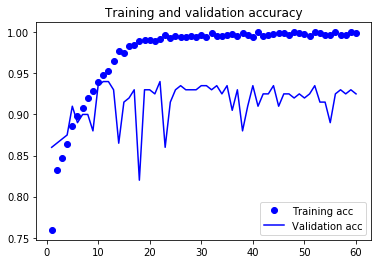

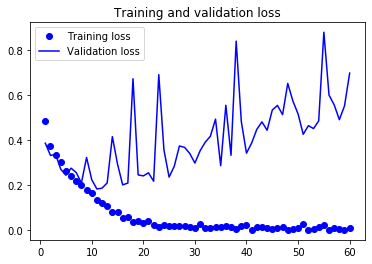

In [16]:
model.save('flowers_1.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Convolutional Networks with Dropout

Ref: https://github.com/mneha4/Training-Neural-Nets---Guidelines

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=60,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/60
100/100 [==============================] - 28s 283ms/step - loss: 0.5198 - acc: 0.7269 - val_loss: 0.5846 - val_acc: 0.7046
Epoch 2/60
100/100 [==============================] - 25s 252ms/step - loss: 0.4042 - acc: 0.8206 - val_loss: 0.3250 - val_acc: 0.8722
Epoch 3/60
100/100 [==============================] - 26s 260ms/step - loss: 0.3650 - acc: 0.8415 - val_loss: 0.3107 - val_acc: 0.8820
Epoch 4/60
100/100 [==============================] - 25s 253ms/step - loss: 0.3303 - acc: 0.8575 - val_loss: 0.2582 - val_acc: 0.9071
Epoch 5/60
100/100 [==============================] - 26s 258ms/step - loss: 0.3244 - acc: 0.8591 - val_loss: 0.2680 - val_acc: 0.8946
Epoch 6/60
100/100 [==============================] - 25s 250ms/step - loss: 0.2986 - acc: 0.8715 - val_loss: 0.4440 - val_acc: 0.7870
Epoch 7/60
100/100 [==============================] - 25s 251ms/step - loss: 0.2941 - acc: 0.8697 - val_los

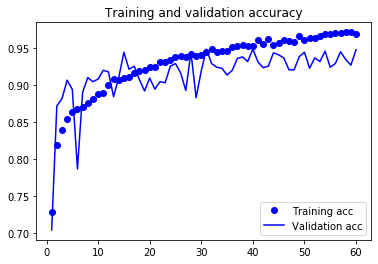

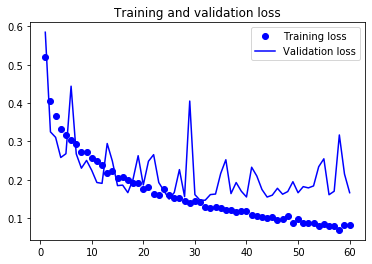

In [19]:
model.save('flowers_2.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Show a test case with graphics

In [0]:
def img_to_display(filename):
    # inspired on this kernel:
    # https://www.kaggle.com/stassl/displaying-inline-images-in-pandas-dataframe
    # credits to stassl :)
    
    i = Image.open(filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()
    

def display_result(filename, prediction, target):
    '''
    Display the results in HTML
    
    '''

    type_image = 'Unknown'
    
    if(prediction[0]>prediction[1] and prediction[0]>0.5):
        type_image = 'Sunflower'
    elif(prediction[0]<prediction[1] and prediction[1]>0.5):
        type_image = 'Tulip'
    
            
    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 420px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <h3 style="margin-left: 50px; margin-top: 2px;">Predict is{}</h3>
            <p style="margin-left: 50px; margin-top: -6px; font-size: 12px">{} probability of Sunflower:{}</p>
            <p style="margin-left: 50px; margin-top: -6px; font-size: 12px">probability of Tulip:{}</p>
            <p style="margin-left: 50px; margin-top: -16px; font-size: 12px">Real Target: {}</p>
            <p style="margin-left: 50px; margin-top: -16px; font-size: 12px">Filename: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , type_image
               , "{0:.2f}%".format(prediction[0]*100,2)
               , "{0:.2f}%".format(prediction[1]*100,2)
               , target
               , filename.split('/')[-1]
               )

    display(HTML(display_html))

In [0]:
import numpy as np
def flower_prediction(filename):
    '''
    predict the gender
    
    input:
        filename: str of the file name
        
    return:
        array of the prob of the targets.
    
    '''
    
    im = cv2.imread(filename)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (178, 218)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)
    
    # prediction
    result = model.predict(im)
    prediction = np.argmax(result)
    
    return result

In [0]:
!rm -r mytest2
!mkdir mytest2
!mkdir mytest2/tulip
!mkdir mytest2/sunflower

In [144]:
import random
import numpy as np

my_test_folder="mytest2"
data_test=[];
real_result=[];


file_test_1=os.path.join(test_sunflower_dir,random.choice(os.listdir(test_sunflower_dir)));
print(file_test_1)
shutil.copyfile(file_test_1, os.path.join(my_test_folder+"/tulip","1.jpg"))
#shutil.copyfile(file_test_1, os.path.join(my_test_folder+"/sunflower","1.jpg"))

#data_test.append()
#real_result.append("Sunflower")


file_test_2=os.path.join(test_tulip_dir,random.choice(os.listdir(test_tulip_dir)));
print(file_test_2)
shutil.copyfile(file_test_2, os.path.join(my_test_folder+"/tulip","2.jpg"))
 #data_test.append(os.path.join(test_tulip_dir,file_test_2))
 #real_result.append("Tulip")

 #file_test_3=random.choice(os.listdir("flowers/rose"));
 #data_test.append(os.path.join("flowers/rose",file_test_3))
 #real_result.append("Rose")

 #result = model.predict(file_test_1)
 #prediction = np.argmax(result)


contents/test/sunflower/15054865768_2cc87ac9d4_m.jpg
contents/test/tulip/14957470_6a8c272a87_m.jpg


'mytest2/tulip/2.jpg'

In [163]:
mytest_datagen = ImageDataGenerator(rescale=1./255)
mytest_generator = test_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10000,
                                                        class_mode='binary')
mytest_generator.reset()
pred=model.predict_generator(mytest_generator,steps=1,verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)
#print(predicted_class_indices)
print(len(predicted_class_indices))
print(predicted_class_indices)

for x in pred:
  print("{0:.3f}%".format(x[0]))

Found 200 images belonging to 2 classes.
1/1 [==============================] - 1s 588ms/step
200
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1.000%
0.000%
1.000%
0.000%
0.000%
1.000%
0.000%
1.000%
0.961%
0.680%
0.996%
0.048%
0.000%
0.998%
0.000%
0.000%
0.000%
0.779%
0.001%
1.000%
1.000%
1.000%
0.000%
0.991%
0.996%
0.000%
0.000%
0.040%
1.000%
0.000%
0.000%
1.000%
0.044%
0.000%
0.000%
0.000%
0.956%
0.270%
0.000%
0.000%
0.000%
0.042%
0.000%
1.000%
0.000%
0.977%
0.946%
0.000%
0.000%
0.000%
0.000%
0.000%
1.000%
1.000%
1.000%
0.000%
1.000%
0.000%
0.962%
1.000%
1.000%
1.000%
1.000%
0.000%
0.998%
0.993%
1.000%
1.000%
0.000%
0.216%
0.019

In [158]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
predictions

['sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunf

In [161]:
import numpy as np
from keras.preprocessing import image

img_width, img_height = 150, 150
img = image.load_img('contents/test/sunflower/184683023_737fec5b18.jpg', target_size = (img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

predict=model.predict(img)[0]
predict

array([0.], dtype=float32)

In [99]:
print(test_dir)

NameError: ignored

In [102]:
os.listdir("mytest2/sunflower")

['1.jpg']